# Semantic Pattern Synthesis
This notebook synthesizes experiments analyzing the topological and functional structure of contextual meaning. We focus on the verb **'run'**, examining BERT trajectories, curvature, clustering, and functional mapping.

## 1. Load contextual sentences
We define 48 contextual uses of *'run'* evenly across four semantic functions:

In [11]:
sentences = [
    # descriptive (12)
    "She likes to run early in the morning before work.",
    "The marathon runner collapsed after a grueling 26-mile run.",
    "The river runs along the eastern border.",
    "The software update runs automatically.",
    "His nose began to run during the allergy season.",
    "The ink began to run in the rain.",
    "We saw a deer run across the highway at dusk.",
    "The children ran through the field chasing butterflies.",
    "The mountain stream runs fast in spring.",
    "The play ran for three consecutive seasons.",
    "They ran diagnostics to isolate the error.",
    "She ran her fingers along the dusty shelf.",
    # evaluative (12)
    "That joke is starting to run thin.",
    "The show has had a good run but it's time to end.",
    "Don’t let your temper run away with you.",
    "The campaign is running out of steam.",
    "He let the story run its course.",
    "This film had a limited theatrical run.",
    "That rumor ran rampant on social media.",
    "He was caught in a run of bad luck.",
    "He’s running behind schedule again.",
    "She’s running on empty after a tough week.",
    "The idea ran against conventional wisdom.",
    "His excuses are beginning to run thin.",
    # narrative (12)
    "He ran into trouble with the tax authorities.",
    "She ran the numbers twice before presenting them.",
    "The suspect tried to run from the scene.",
    "We did a test run before the final performance.",
    "The faucet was left on and water began to run.",
    "She screamed and began to run down the street.",
    "He let his imagination run wild.",
    "They ran a tight ship in that department.",
    "They run tests on samples before publishing results.",
    "Let’s run through the list one more time.",
    "He ran his hand over the sculpture's surface.",
    "The children ran screaming through the sprinkler.",
    # performative (12)
    "Run the idea by me again.",
    "Let the engine run for five minutes.",
    "Run for your life!",
    "She decided to run the experiment again.",
    "They’re running a sale on electronics this weekend.",
    "She’s running for president of the council.",
    "The manager ran the meeting efficiently.",
    "He used to run track in college.",
    "They run a family-owned bakery downtown.",
    "He decided to run for office in the next election.",
    "Please run this report by end of day.",
    "Run the installer before rebooting."
]
# 🧠 Matching semantic function per sentence
semantic_functions = (
    ["descriptive"] * 12 +
    ["evaluative"] * 12 +
    ["narrative"] * 12 +
    ["performative"] * 12
)

## 2. BERT Trajectory Extraction
We extract the contextual embedding of each 'run' token across 12 BERT layers.

In [12]:
from transformers import BertTokenizer, BertModel
import torch, numpy as np
from tqdm import tqdm

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)
model.eval()

trajectories = []
valid_sentences = []

print("🔍 Matching token: 'run'")

for sent in tqdm(sentences):
    inputs = tokenizer(sent, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    input_ids = inputs["input_ids"][0]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    print(f"🧾 Sentence: {sent}")
    print(f"🔤 Tokens: {tokens}")

    match_indices = [i for i, tok in enumerate(tokens) if "run" in tok.lower()]
    if not match_indices:
        print("⚠️ No 'run' token found — skipping.")
        continue

    idx = match_indices[0]
    layers = outputs.hidden_states
    curve = torch.stack([layer[0, idx] for layer in layers])  # shape: (13, 768)
    curve = curve[-12:]  # last 12 layers only

    if curve.shape == (12, 768):
        trajectories.append(curve.numpy())
        valid_sentences.append(sent)
    else:
        print("❌ Unexpected shape — skipping.")

print(f"\n✅ Extracted {len(trajectories)} valid trajectories.")

🔍 Matching token: 'run'


  2%|██▎                                                                                                             | 1/48 [00:00<00:05,  8.82it/s]

🧾 Sentence: She likes to run early in the morning before work.
🔤 Tokens: ['[CLS]', 'she', 'likes', 'to', 'run', 'early', 'in', 'the', 'morning', 'before', 'work', '.', '[SEP]']
🧾 Sentence: The marathon runner collapsed after a grueling 26-mile run.
🔤 Tokens: ['[CLS]', 'the', 'marathon', 'runner', 'collapsed', 'after', 'a', 'gr', '##uel', '##ing', '26', '-', 'mile', 'run', '.', '[SEP]']


  6%|███████                                                                                                         | 3/48 [00:00<00:03, 12.60it/s]

🧾 Sentence: The river runs along the eastern border.
🔤 Tokens: ['[CLS]', 'the', 'river', 'runs', 'along', 'the', 'eastern', 'border', '.', '[SEP]']


 10%|███████████▋                                                                                                    | 5/48 [00:00<00:07,  6.04it/s]

🧾 Sentence: The software update runs automatically.
🔤 Tokens: ['[CLS]', 'the', 'software', 'update', 'runs', 'automatically', '.', '[SEP]']
🧾 Sentence: His nose began to run during the allergy season.
🔤 Tokens: ['[CLS]', 'his', 'nose', 'began', 'to', 'run', 'during', 'the', 'all', '##ergy', 'season', '.', '[SEP]']


 12%|██████████████                                                                                                  | 6/48 [00:00<00:07,  5.70it/s]

🧾 Sentence: The ink began to run in the rain.
🔤 Tokens: ['[CLS]', 'the', 'ink', 'began', 'to', 'run', 'in', 'the', 'rain', '.', '[SEP]']


 17%|██████████████████▋                                                                                             | 8/48 [00:01<00:07,  5.37it/s]

🧾 Sentence: We saw a deer run across the highway at dusk.
🔤 Tokens: ['[CLS]', 'we', 'saw', 'a', 'deer', 'run', 'across', 'the', 'highway', 'at', 'dusk', '.', '[SEP]']
🧾 Sentence: The children ran through the field chasing butterflies.
🔤 Tokens: ['[CLS]', 'the', 'children', 'ran', 'through', 'the', 'field', 'chasing', 'butterflies', '.', '[SEP]']
⚠️ No 'run' token found — skipping.


 21%|███████████████████████▏                                                                                       | 10/48 [00:01<00:07,  5.32it/s]

🧾 Sentence: The mountain stream runs fast in spring.
🔤 Tokens: ['[CLS]', 'the', 'mountain', 'stream', 'runs', 'fast', 'in', 'spring', '.', '[SEP]']
🧾 Sentence: The play ran for three consecutive seasons.
🔤 Tokens: ['[CLS]', 'the', 'play', 'ran', 'for', 'three', 'consecutive', 'seasons', '.', '[SEP]']
⚠️ No 'run' token found — skipping.


 25%|███████████████████████████▊                                                                                   | 12/48 [00:02<00:06,  5.35it/s]

🧾 Sentence: They ran diagnostics to isolate the error.
🔤 Tokens: ['[CLS]', 'they', 'ran', 'diagnostic', '##s', 'to', 'isolate', 'the', 'error', '.', '[SEP]']
⚠️ No 'run' token found — skipping.
🧾 Sentence: She ran her fingers along the dusty shelf.
🔤 Tokens: ['[CLS]', 'she', 'ran', 'her', 'fingers', 'along', 'the', 'dusty', 'shelf', '.', '[SEP]']
⚠️ No 'run' token found — skipping.


 29%|████████████████████████████████▍                                                                              | 14/48 [00:02<00:06,  5.66it/s]

🧾 Sentence: That joke is starting to run thin.
🔤 Tokens: ['[CLS]', 'that', 'joke', 'is', 'starting', 'to', 'run', 'thin', '.', '[SEP]']
🧾 Sentence: The show has had a good run but it's time to end.
🔤 Tokens: ['[CLS]', 'the', 'show', 'has', 'had', 'a', 'good', 'run', 'but', 'it', "'", 's', 'time', 'to', 'end', '.', '[SEP]']


 33%|█████████████████████████████████████                                                                          | 16/48 [00:02<00:05,  5.68it/s]

🧾 Sentence: Don’t let your temper run away with you.
🔤 Tokens: ['[CLS]', 'don', '’', 't', 'let', 'your', 'temper', 'run', 'away', 'with', 'you', '.', '[SEP]']
🧾 Sentence: The campaign is running out of steam.
🔤 Tokens: ['[CLS]', 'the', 'campaign', 'is', 'running', 'out', 'of', 'steam', '.', '[SEP]']


 35%|███████████████████████████████████████▎                                                                       | 17/48 [00:03<00:06,  4.83it/s]

🧾 Sentence: He let the story run its course.
🔤 Tokens: ['[CLS]', 'he', 'let', 'the', 'story', 'run', 'its', 'course', '.', '[SEP]']


 40%|███████████████████████████████████████████▉                                                                   | 19/48 [00:03<00:05,  5.03it/s]

🧾 Sentence: This film had a limited theatrical run.
🔤 Tokens: ['[CLS]', 'this', 'film', 'had', 'a', 'limited', 'theatrical', 'run', '.', '[SEP]']
🧾 Sentence: That rumor ran rampant on social media.
🔤 Tokens: ['[CLS]', 'that', 'rumor', 'ran', 'rampant', 'on', 'social', 'media', '.', '[SEP]']
⚠️ No 'run' token found — skipping.


 44%|████████████████████████████████████████████████▌                                                              | 21/48 [00:03<00:05,  5.14it/s]

🧾 Sentence: He was caught in a run of bad luck.
🔤 Tokens: ['[CLS]', 'he', 'was', 'caught', 'in', 'a', 'run', 'of', 'bad', 'luck', '.', '[SEP]']
🧾 Sentence: He’s running behind schedule again.
🔤 Tokens: ['[CLS]', 'he', '’', 's', 'running', 'behind', 'schedule', 'again', '.', '[SEP]']


 46%|██████████████████████████████████████████████████▉                                                            | 22/48 [00:04<00:05,  5.13it/s]

🧾 Sentence: She’s running on empty after a tough week.
🔤 Tokens: ['[CLS]', 'she', '’', 's', 'running', 'on', 'empty', 'after', 'a', 'tough', 'week', '.', '[SEP]']


 48%|█████████████████████████████████████████████████████▏                                                         | 23/48 [00:04<00:05,  4.80it/s]

🧾 Sentence: The idea ran against conventional wisdom.
🔤 Tokens: ['[CLS]', 'the', 'idea', 'ran', 'against', 'conventional', 'wisdom', '.', '[SEP]']
⚠️ No 'run' token found — skipping.


 52%|█████████████████████████████████████████████████████████▊                                                     | 25/48 [00:04<00:04,  5.07it/s]

🧾 Sentence: His excuses are beginning to run thin.
🔤 Tokens: ['[CLS]', 'his', 'excuses', 'are', 'beginning', 'to', 'run', 'thin', '.', '[SEP]']
🧾 Sentence: He ran into trouble with the tax authorities.
🔤 Tokens: ['[CLS]', 'he', 'ran', 'into', 'trouble', 'with', 'the', 'tax', 'authorities', '.', '[SEP]']
⚠️ No 'run' token found — skipping.


 56%|██████████████████████████████████████████████████████████████▍                                                | 27/48 [00:04<00:03,  5.98it/s]

🧾 Sentence: She ran the numbers twice before presenting them.
🔤 Tokens: ['[CLS]', 'she', 'ran', 'the', 'numbers', 'twice', 'before', 'presenting', 'them', '.', '[SEP]']
⚠️ No 'run' token found — skipping.
🧾 Sentence: The suspect tried to run from the scene.
🔤 Tokens: ['[CLS]', 'the', 'suspect', 'tried', 'to', 'run', 'from', 'the', 'scene', '.', '[SEP]']


 60%|███████████████████████████████████████████████████████████████████                                            | 29/48 [00:05<00:03,  6.13it/s]

🧾 Sentence: We did a test run before the final performance.
🔤 Tokens: ['[CLS]', 'we', 'did', 'a', 'test', 'run', 'before', 'the', 'final', 'performance', '.', '[SEP]']
🧾 Sentence: The faucet was left on and water began to run.
🔤 Tokens: ['[CLS]', 'the', 'fa', '##uce', '##t', 'was', 'left', 'on', 'and', 'water', 'began', 'to', 'run', '.', '[SEP]']


 65%|███████████████████████████████████████████████████████████████████████▋                                       | 31/48 [00:05<00:03,  5.51it/s]

🧾 Sentence: She screamed and began to run down the street.
🔤 Tokens: ['[CLS]', 'she', 'screamed', 'and', 'began', 'to', 'run', 'down', 'the', 'street', '.', '[SEP]']
🧾 Sentence: He let his imagination run wild.
🔤 Tokens: ['[CLS]', 'he', 'let', 'his', 'imagination', 'run', 'wild', '.', '[SEP]']


 69%|████████████████████████████████████████████████████████████████████████████▎                                  | 33/48 [00:05<00:02,  6.11it/s]

🧾 Sentence: They ran a tight ship in that department.
🔤 Tokens: ['[CLS]', 'they', 'ran', 'a', 'tight', 'ship', 'in', 'that', 'department', '.', '[SEP]']
⚠️ No 'run' token found — skipping.
🧾 Sentence: They run tests on samples before publishing results.
🔤 Tokens: ['[CLS]', 'they', 'run', 'tests', 'on', 'samples', 'before', 'publishing', 'results', '.', '[SEP]']


 71%|██████████████████████████████████████████████████████████████████████████████▋                                | 34/48 [00:06<00:02,  6.57it/s]

🧾 Sentence: Let’s run through the list one more time.
🔤 Tokens: ['[CLS]', 'let', '’', 's', 'run', 'through', 'the', 'list', 'one', 'more', 'time', '.', '[SEP]']


 75%|███████████████████████████████████████████████████████████████████████████████████▎                           | 36/48 [00:06<00:01,  6.01it/s]

🧾 Sentence: He ran his hand over the sculpture's surface.
🔤 Tokens: ['[CLS]', 'he', 'ran', 'his', 'hand', 'over', 'the', 'sculpture', "'", 's', 'surface', '.', '[SEP]']
⚠️ No 'run' token found — skipping.
🧾 Sentence: The children ran screaming through the sprinkler.
🔤 Tokens: ['[CLS]', 'the', 'children', 'ran', 'screaming', 'through', 'the', 'sp', '##rin', '##kle', '##r', '.', '[SEP]']
⚠️ No 'run' token found — skipping.


 79%|███████████████████████████████████████████████████████████████████████████████████████▉                       | 38/48 [00:06<00:01,  6.09it/s]

🧾 Sentence: Run the idea by me again.
🔤 Tokens: ['[CLS]', 'run', 'the', 'idea', 'by', 'me', 'again', '.', '[SEP]']
🧾 Sentence: Let the engine run for five minutes.
🔤 Tokens: ['[CLS]', 'let', 'the', 'engine', 'run', 'for', 'five', 'minutes', '.', '[SEP]']


 83%|████████████████████████████████████████████████████████████████████████████████████████████▌                  | 40/48 [00:07<00:01,  6.20it/s]

🧾 Sentence: Run for your life!
🔤 Tokens: ['[CLS]', 'run', 'for', 'your', 'life', '!', '[SEP]']
🧾 Sentence: She decided to run the experiment again.
🔤 Tokens: ['[CLS]', 'she', 'decided', 'to', 'run', 'the', 'experiment', 'again', '.', '[SEP]']


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████▏             | 42/48 [00:07<00:00,  6.88it/s]

🧾 Sentence: They’re running a sale on electronics this weekend.
🔤 Tokens: ['[CLS]', 'they', '’', 're', 'running', 'a', 'sale', 'on', 'electronics', 'this', 'weekend', '.', '[SEP]']
🧾 Sentence: She’s running for president of the council.
🔤 Tokens: ['[CLS]', 'she', '’', 's', 'running', 'for', 'president', 'of', 'the', 'council', '.', '[SEP]']


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 44/48 [00:07<00:00,  7.52it/s]

🧾 Sentence: The manager ran the meeting efficiently.
🔤 Tokens: ['[CLS]', 'the', 'manager', 'ran', 'the', 'meeting', 'efficiently', '.', '[SEP]']
⚠️ No 'run' token found — skipping.
🧾 Sentence: He used to run track in college.
🔤 Tokens: ['[CLS]', 'he', 'used', 'to', 'run', 'track', 'in', 'college', '.', '[SEP]']


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 46/48 [00:07<00:00,  7.65it/s]

🧾 Sentence: They run a family-owned bakery downtown.
🔤 Tokens: ['[CLS]', 'they', 'run', 'a', 'family', '-', 'owned', 'bakery', 'downtown', '.', '[SEP]']
🧾 Sentence: He decided to run for office in the next election.
🔤 Tokens: ['[CLS]', 'he', 'decided', 'to', 'run', 'for', 'office', 'in', 'the', 'next', 'election', '.', '[SEP]']


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:08<00:00,  5.93it/s]

🧾 Sentence: Please run this report by end of day.
🔤 Tokens: ['[CLS]', 'please', 'run', 'this', 'report', 'by', 'end', 'of', 'day', '.', '[SEP]']
🧾 Sentence: Run the installer before rebooting.
🔤 Tokens: ['[CLS]', 'run', 'the', 'install', '##er', 'before', 're', '##boot', '##ing', '.', '[SEP]']

✅ Extracted 36 valid trajectories.


## 3. PCA Dimensionality Reduction

In [13]:
from sklearn.decomposition import PCA
flat = np.stack(trajectories).reshape(len(trajectories), -1)
pca = PCA(n_components=30)
reduced = pca.fit_transform(flat)


## 4. Scree Plot

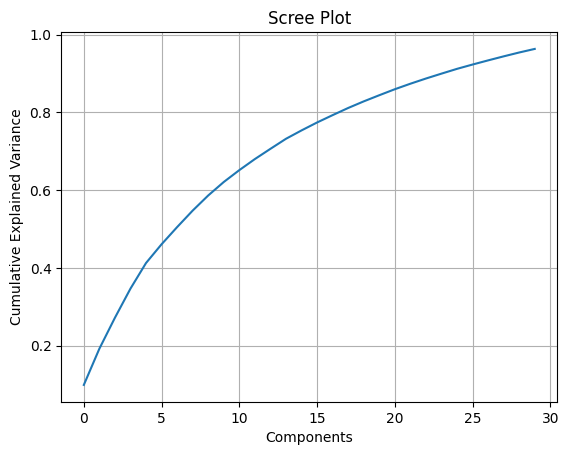

In [14]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

## 5. UMAP Projection + DBSCAN

In [15]:
from umap import UMAP
from sklearn.cluster import DBSCAN
umap = UMAP(n_components=3)
embed = umap.fit_transform(flat)
db = DBSCAN(eps=0.8, min_samples=3)
labels = db.fit_predict(embed)
print("Labels:", labels)

Labels: [ 0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0  0  0  0  1  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0]


/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## 6. Visualize UMAP Projection

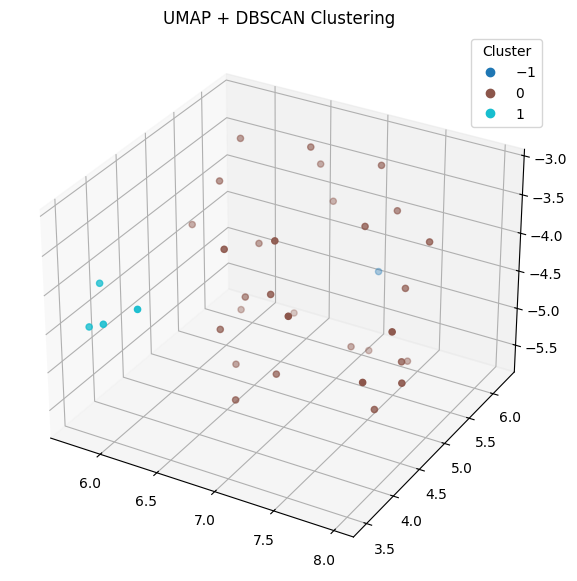

In [16]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embed[:,0], embed[:,1], embed[:,2], c=labels, cmap='tab10')
plt.legend(*sc.legend_elements(), title="Cluster")
plt.title("UMAP + DBSCAN Clustering")
plt.show()

## 7. Cluster to Function Distribution

In [17]:
# ⛳ Make sure this matches the filtered trajectories
valid_funcs = [semantic_functions[i] for i, traj in enumerate(trajectories) if traj.shape == (12, 768)]

# 🧭 Map functions to clusters
from collections import defaultdict
cluster_map = defaultdict(list)

for i, lbl in enumerate(labels):
    if i < len(valid_funcs):
        cluster_map[lbl].append(valid_funcs[i])

# 🖨️ Print function composition of each cluster
for cl, fs in cluster_map.items():
    print(f"\n🔹 Cluster {cl}:")
    for func in sorted(set(fs)):
        print(f"  {func}: {fs.count(func)} / {len(fs)}")


🔹 Cluster 0:
  descriptive: 11 / 31
  evaluative: 9 / 31
  narrative: 11 / 31

🔹 Cluster 1:
  descriptive: 1 / 4
  evaluative: 3 / 4

🔹 Cluster -1:
  narrative: 1 / 1
